In [1]:
#Importing the required libraries and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [2]:
#Let import the csv files and put in the Dataframe
sbi=pd.read_csv('C:/Users/hp/Downloads/DSData-master/SBI_Life_insurance.csv')
claim=pd.DataFrame(sbi)
#Take a look for structure of data
claim.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#checking for the information of each feature
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
#shape of the data
claim.shape

(1338, 8)

In [5]:
#lets check for the null values in the dataset
claim.isnull().sum()
#So we get there is no null values in any column here

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

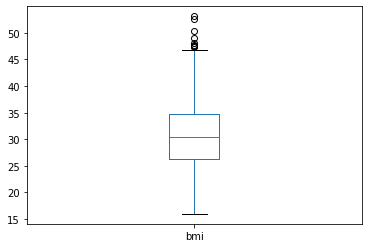

In [6]:
#plotting the boxplot for bmi column to check for outliers
claim['bmi'].plot.box()
#Here we get there is some outliers in the data

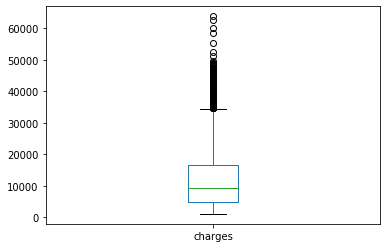

In [7]:
#plotting the boxplot for charges column to check for outliers
claim['charges'].plot.box()
#Here we get there is large no.of outliers in the data

In [8]:
#get the description of the data
claim.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
#there is huge number of outliers in charges column,so lets import boxcox to handle
from scipy.stats import boxcox
claim['charges']=boxcox(claim['charges'],0)

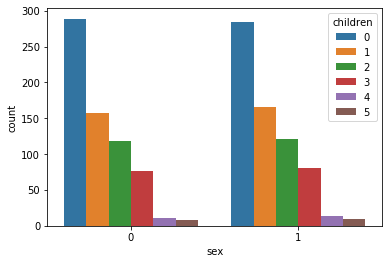

In [10]:
#plotting the countplot for gettng sex to children ratio
sns.countplot(x='sex',hue='children',data=claim)

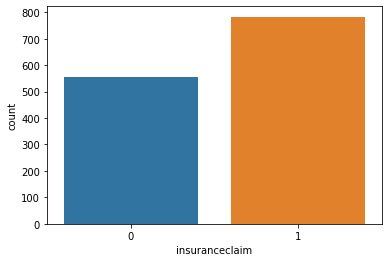

In [11]:
sns.countplot(x="insuranceclaim",data=claim)
#data is imbalanced but both instance has significance no.of values

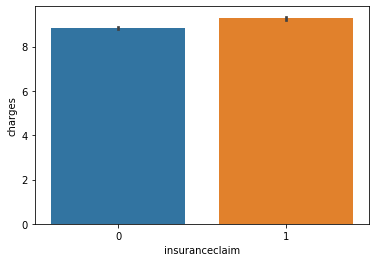

In [12]:
#plotting of barplot on insurance claim wrt to charges
sns.barplot(x='insuranceclaim',y='charges',data=claim)
#both 

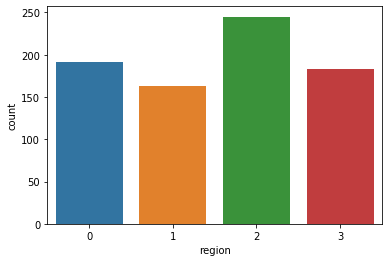

In [13]:
#plotting of countplot for number of claims per region
sns.countplot(x="region",data=claim.loc[claim["insuranceclaim"]==1])
#highest number of claim are from 2nd region

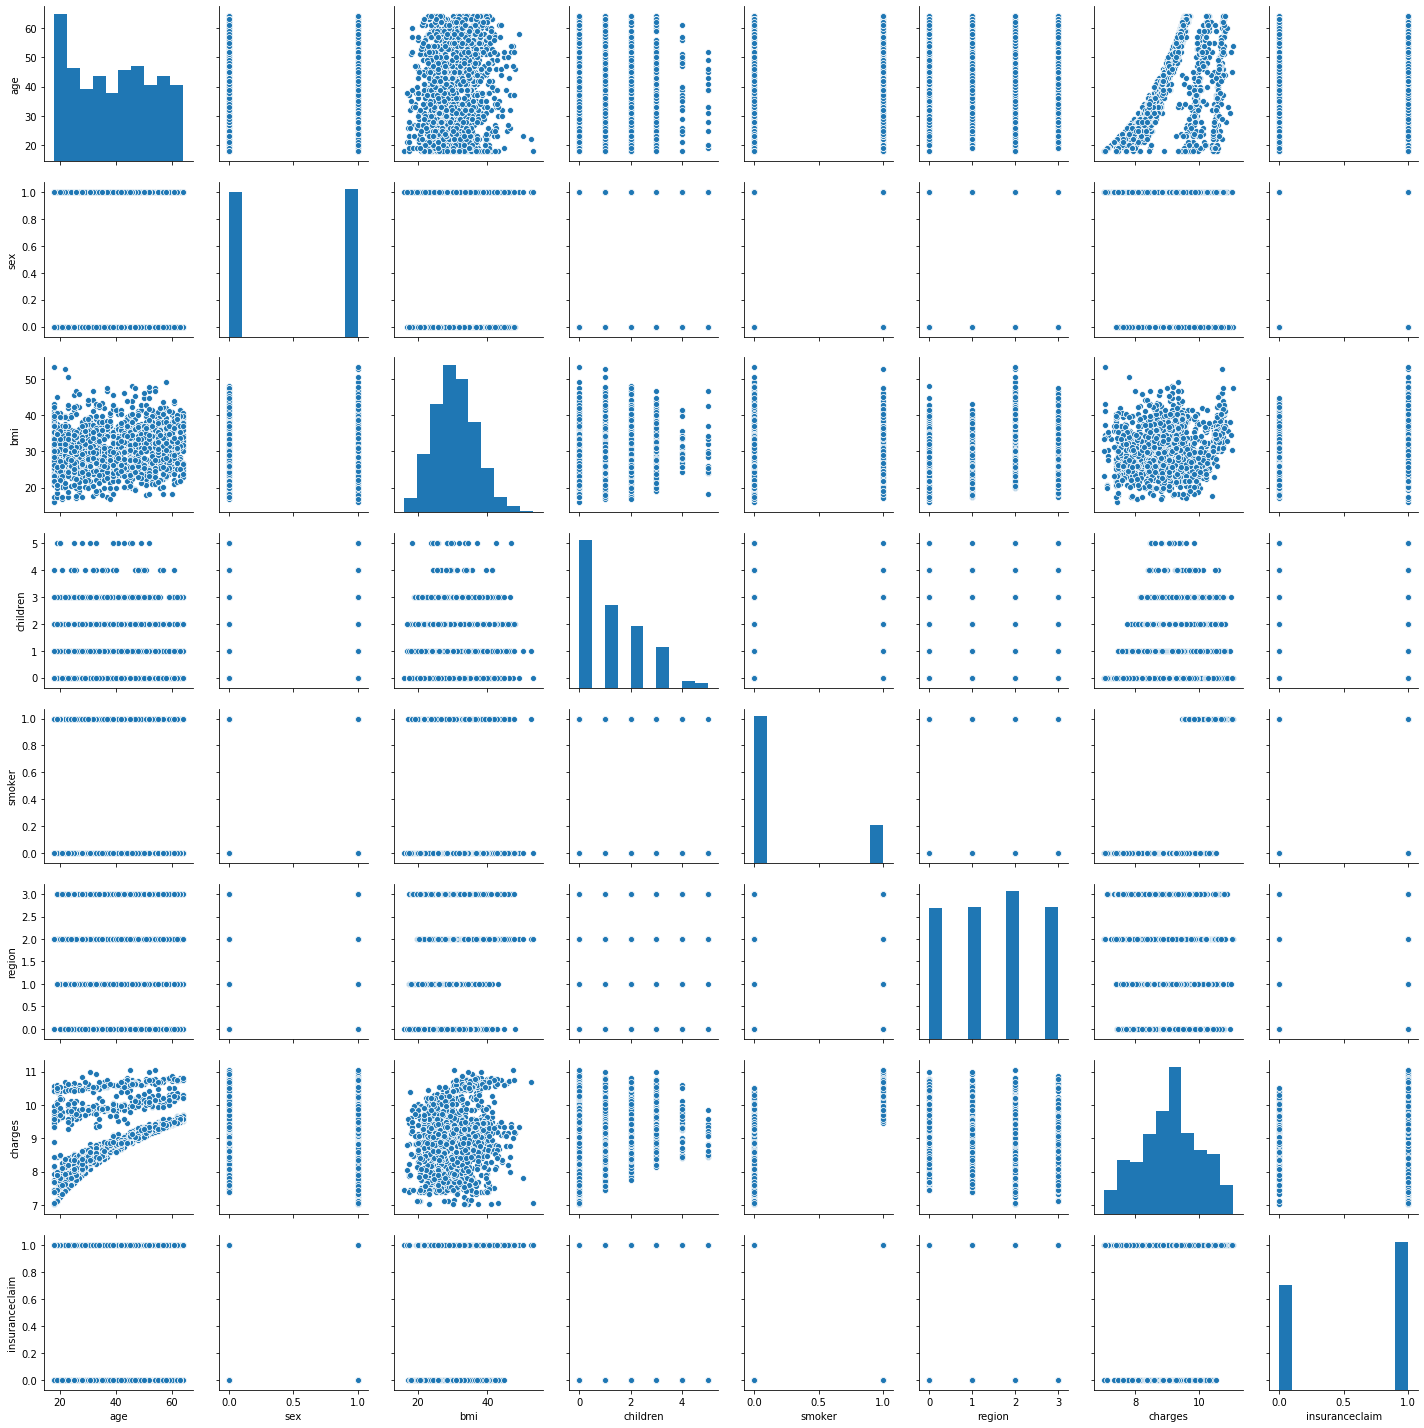

In [14]:
sns.pairplot(claim)

In [15]:
#seperation of input and target variables
mod_x=claim.iloc[:,:-1]
y=claim.iloc[:,-1]

In [16]:
#lets put all features of input variables on the same scale
from sklearn.preprocessing import StandardScaler
#creating instance for standard scaler and performing the other operations
scale=StandardScaler()
x=scale.fit_transform(mod_x)
x=pd.DataFrame(x,columns=mod_x.columns)

In [17]:
#creating function for determining random_state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [18]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [19]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [20]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [21]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [22]:
#Now we start for implying algorithms
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
lr=LogisticRegression()
random(lr)

0.9027149321266968 at 83


In [23]:
cross_val(lr)

[0.86940299 0.8880597  0.8880597  0.90262172 0.8576779 ]
mean_score= 0.8811644027055733
standard deviation 0.0157826075743458


In [24]:
#lets check for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.9932126696832579 at 83


In [25]:
cross_val(dtc)

[0.99253731 0.96268657 0.9738806  0.97378277 0.98127341]
mean_score= 0.9768321314774443
standard deviation 0.009843625561855876


In [26]:
#lets check for naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.834841628959276 at 59


In [27]:
cross_val(gnb)

[0.74626866 0.78358209 0.80223881 0.84269663 0.76404494]
mean_score= 0.7877662250545028
standard deviation 0.03325374941476494


In [28]:
#implying k-neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters) 
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 1}

In [29]:
knn=KNeighborsClassifier(n_neighbors=1)
random(knn)

0.9072398190045249 at 69


In [30]:
cross_val(knn)

[0.86567164 0.90671642 0.89552239 0.88389513 0.89138577]
mean_score= 0.8886382693275197
standard deviation 0.013650806829517144


In [31]:
#implying some ensemble techniques
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
random(rf)

0.9683257918552036 at 94


Lets use decision tree classifier as our final model,as it has maximum accuracy score of 0.99 at random_state of 83

In [32]:
#Implying all the operations for decison tree using model function we declared earlier using proper random_state in train_test
dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=83)
model(dtc)

score= 1.0
0.995475113122172
[[171   1]
 [  1 269]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       1.00      1.00      1.00       270

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



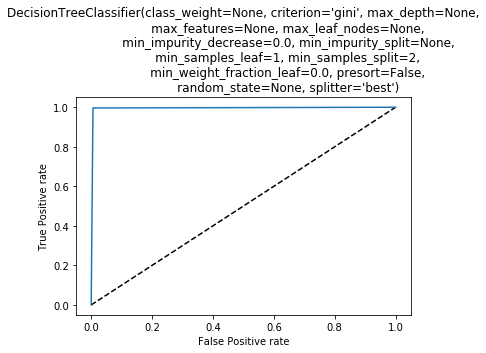

roc_score= 0.9952411714039622


In [33]:
#plot for roc_auc curve using roc(alg) function above declared
roc(dtc)

In [34]:
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(dtc,'Sbi_insurance.pkl')

['Sbi_insurance.pkl']